In [1]:
import numpy as np
import pandas as pd

In [2]:
with open('nyt_data.txt') as f:
    documents = f.readlines()
documents = [x.strip().strip('\n').strip("'").strip('\ufeff') for x in documents] 


In [3]:
with open('nyt_vocab.dat') as f:
    vocabs = f.readlines()
vocabs = [x.strip().strip('\n').strip("'").strip('\ufeff') for x in vocabs] 

In [4]:
#create matrix X
X = np.zeros([3012,8447])

In [5]:
for col in range(len(documents)):
    for row in documents[col].split(','):
        X[int(row.split(':')[0])-1][col] = int(row.split(':')[1])

In [7]:
#initate W and H
rank = 25
W = np.random.uniform(1,2,(3012,rank))
H = np.random.uniform(1,2,(rank,8447))

In [8]:
wt = W.T

In [9]:
from sklearn.preprocessing import normalize
Wt_n = normalize(W.T, axis=1, norm='l1')

In [10]:
import math
def calculate_H(W, H, df):
    
    p = np.divide(X, np.dot(W, H) + math.pow(10, -16))
    
    #normalize rows of W_t
    W_t = W.T
    row_sums = W_t.sum(axis=1) + math.pow(10, -16)
    Wt_n = W_t / row_sums[:, np.newaxis]
    H = np.multiply(H, np.matmul(Wt_n, p)) 
    
    return H 

In [11]:
def calculate_W(W, H, df):
    
    p = np.divide(X, np.dot(W, H) + math.pow(10, -16))

    #normalize rows of H
    row_sums = H.sum(axis=1) + math.pow(10, -16)
    H_n = H / row_sums[:, np.newaxis]  
    W = np.multiply(W, np.matmul(p, H_n.T))

    return W 

In [16]:
def NMF (W, H, df, iterations=100):
    d_s = [] 
    for i in range(iterations):
        if i % 10 == 0:
            print("iter:", i)
        H = calculate_H(W, H, X)
        W = calculate_W(W, H, X)

        WH = W.dot(H)
        obj = -1 * (X * np.log(WH + math.pow(10, -16)) - WH)
        
        d_s.append(obj.sum())
        
    return d_s, W, H

In [17]:
d_obj, final_W, final_H = NMF(W, H, X)

iter: 0
iter: 10
iter: 20
iter: 30
iter: 40
iter: 50
iter: 60
iter: 70
iter: 80
iter: 90


Text(0.5, 1.0, 'Divergence Objective')

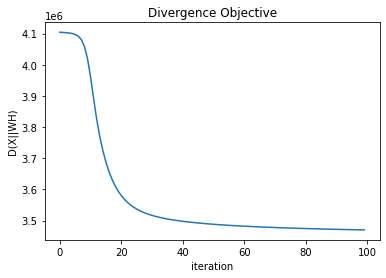

In [18]:
import matplotlib.pyplot as plt
x = np.arange(100)
plt.plot(x, d_obj)
plt.xlabel('iteration')
plt.ylabel('D(X||WH)')
plt.title("Divergence Objective")

In [19]:
norm_W = normalize(final_W, axis=0, norm='l1')

In [20]:
norm_W_df = pd.DataFrame(norm_W)

In [21]:
topics = [[] for x in range(25)]
weights_list = [[] for x in range(25)]
for topic in range(25):
    top = norm_W_df.nlargest(10, topic)
    weights = top[topic]
    indexes = top.index
    
   
    for i in indexes:
        word = vocabs[i]
        weight = weights[i]
        
        topics[topic].append(word)
        weights_list[topic].append(weight)

In [23]:
for i in range(len(topics)):
    d = {'vocab':topics[i], 'weight':weights_list[i]}
    print(pd.DataFrame(d))
    print("\n")

     vocab    weight
0     game  0.032461
1     team  0.029699
2     play  0.025656
3   player  0.021686
4   season  0.021357
5      win  0.011987
6    coach  0.011662
7    point  0.009602
8    score  0.009322
9  victory  0.008419


      vocab    weight
0   percent  0.028274
1      rate  0.020307
2  increase  0.016705
3       cut  0.013032
4   economy  0.011671
5       pay  0.011531
6     money  0.011272
7      rise  0.011160
8      cost  0.009993
9    dollar  0.009565


    vocab    weight
0  second  0.017711
1     hit  0.016372
2     win  0.015149
3   third  0.012153
4   start  0.010436
5  finish  0.009548
6    race  0.009024
7     tie  0.007201
8  minute  0.007138
9   break  0.007002


     vocab    weight
0    visit  0.008955
1     trip  0.008317
2     city  0.007680
3   ticket  0.007492
4  weekend  0.007346
5   travel  0.007328
6     open  0.007188
7     town  0.007014
8   summer  0.006887
9     home  0.006878


       vocab    weight
0      thing  0.010343
1   question  0.010209